# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV

# Load Dataset

In [2]:
df = pd.read_csv('big_tech_stock_prices.csv')

# Explore the dataset
print(df.head())

  stock_symbol        date      open      high       low     close  adj_close  \
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  


# Extraxt Predictor(X) and Target(Y)

In [3]:
# Extract relevant features and target variable
X = df[['open', 'volume']]  # Add more features as needed
y = df['adj_close']

# Train Test Split and model training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred_test = regr.predict(X_test)

# Model Evaluation

In [7]:
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 10.5965
R-squared = 0.9895


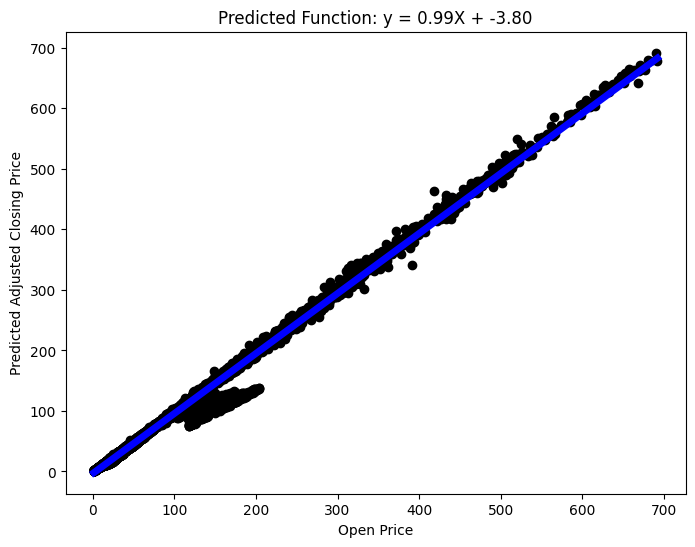

In [9]:
open_price_range = np.linspace(X_test['open'].min(), X_test['open'].max(), 100).reshape(-1, 1)

mean_volume = X_test['volume'].mean()

new_test_set = np.hstack((open_price_range, np.full(open_price_range.shape, mean_volume)))

new_test_df = pd.DataFrame(new_test_set, columns=['open', 'volume'])


predicted_adj_close_df = regr.predict(new_test_df)


plt.figure(figsize=(8, 6))
plt.scatter(X_test['open'], y_test, color='black')
plt.plot(open_price_range, predicted_adj_close_df, color='blue', linewidth=5)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('Open Price')
plt.ylabel('Predicted Adjusted Closing Price')
plt.show()

# Ridge and Lasso model

In [10]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [11]:
y_pred_test_ridge = ridge_model.predict(X_test)

In [12]:
print("Ridge Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))
print('Ridge R-squared = %.4f' % r2_score(y_test, y_pred_test_ridge))


Ridge Root mean squared error = 10.5965
Ridge R-squared = 0.9895


In [13]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [14]:
y_pred_test_lasso = lasso_model.predict(X_test)

In [15]:
print("Lasso Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print('Lasso R-squared = %.4f' % r2_score(y_test, y_pred_test_lasso))

Lasso Root mean squared error = 10.5965
Lasso R-squared = 0.9895


In [16]:
ridge_cv_model = RidgeCV(alphas=[0.2, 0.4, 0.6, 0.8, 1.0], cv=5)
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=[0.2, 0.4, 0.6, 0.8, 1.0], cv=5)

In [17]:
y_pred_test_ridge_cv = ridge_cv_model.predict(X_test)

In [18]:
print("Ridge CV Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_cv)))
print('Ridge CV R-squared = %.4f' % r2_score(y_test, y_pred_test_ridge_cv))
print("Selected alpha for Ridge CV = %.4f" % ridge_cv_model.alpha_)

Ridge CV Root mean squared error = 10.5965
Ridge CV R-squared = 0.9895
Selected alpha for Ridge CV = 1.0000


In [19]:
lasso_cv_model = LassoCV(alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0], cv=5)
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0], cv=5)

In [20]:
y_pred_test_lasso_cv = lasso_cv_model.predict(X_test)

In [21]:
print("Lasso CV Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_cv)))
print('Lasso CV R-squared = %.4f' % r2_score(y_test, y_pred_test_lasso_cv))
print("Selected alpha for Lasso CV = %.4f" % lasso_cv_model.alpha_)

Lasso CV Root mean squared error = 10.5965
Lasso CV R-squared = 0.9895
Selected alpha for Lasso CV = 0.0100


# Interpretation